# Exam R
Name: Maris van der Velden Studentnumber: #2003885, U-number: #u565467
Partner: Name: Leander van Rooij, Studentnumber: #2012973, U-number: #864850

# Introduction

The exam consists of 2 parts. In the first part, you have to run a regression, test if the assumptions of a linear regression model are met, and make 2 graphs.

In the second part of the exam, you will have to make a map of Catholic and Protestant schools in the Netherlands.

# Packages


In [1]:
library(tidyverse)
library(gvlma)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 2.2.1     <U+221A> purrr   0.2.4
<U+221A> tibble  1.4.2     <U+221A> dplyr   0.7.4
<U+221A> tidyr   0.8.0     <U+221A> stringr 1.3.0
<U+221A> readr   1.1.1     <U+221A> forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Assignment 1


## Data

The data are given:


In [2]:
set.seed(123)
df1 <- as.data.frame(matrix(runif(1*50, min = 1, max = 10), ncol = 1)) %>%
    mutate(epsilon = rnorm(50, mean = 0, sd = 2)) %>%
    mutate(response = 3 - 2* V1  + epsilon) %>%
    mutate(group = ifelse(V1 <= 5, 1,2))

## Asignment 1a

The first assigment is to make boxplot using ggplot with group on the x-axis and V1 on the y-axis.

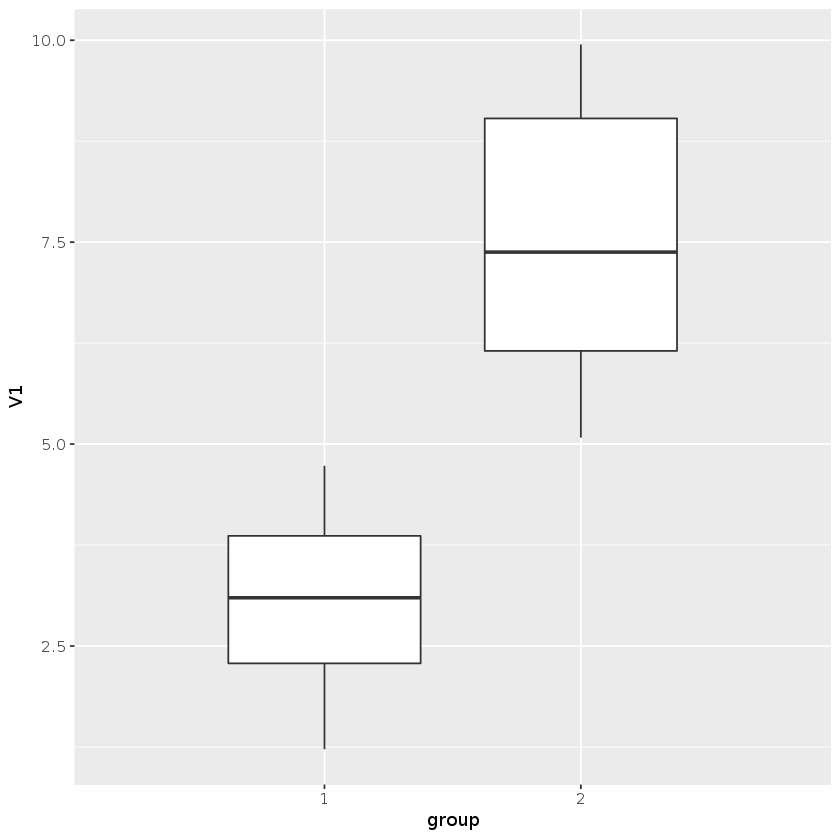

In [3]:
first_plot <-ggplot(data = df1, aes(group=group,x= group, y = V1)) + 
geom_boxplot() + 
scale_x_discrete(limit = c('1', '2'))

first_plot

uitleg: geom_boxplot creates a box plot. 
scale_x_discrete gives that there are 2 group values (integers)


## Assignment 1b

Run a regression with response variable as a function of V1.
Show the summary statistics of the regression.


In [4]:
reg1 <- lm(data=df1, response ~ V1)
summary(reg1)

gvlma(reg1)


Call:
lm(formula = response ~ V1, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5116 -1.1157 -0.1313  1.0985  4.3723 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.6305     0.6347   4.145 0.000138 ***
V1           -1.9152     0.1014 -18.880  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.881 on 48 degrees of freedom
Multiple R-squared:  0.8813,	Adjusted R-squared:  0.8788 
F-statistic: 356.4 on 1 and 48 DF,  p-value: < 2.2e-16



Call:
lm(formula = response ~ V1, data = df1)

Coefficients:
(Intercept)           V1  
      2.630       -1.915  


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = reg1) 

                      Value p-value                Decision
Global Stat        0.654319  0.9568 Assumptions acceptable.
Skewness           0.002398  0.9609 Assumptions acceptable.
Kurtosis           0.007200  0.9324 Assumptions acceptable.
Link Function      0.005852  0.9390 Assumptions acceptable.
Heteroscedasticity 0.638869  0.4241 Assumptions acceptable.

check if the assumptions of linear regression are met with the `gvlma()` function.

uitleg:
lm() is for the regression
summary() literally gives a summary of the model
gvlma() gives the diagnostics


## Assignment 1c

Make a scatterplot with: 
* V1 on the x-axis and the response on the y-axis
* Include the regression line in red with confidence interval 
* In a classic theme
* The x-axis should be labeled "Predictor", the y-axis should be labeled ("Response")



In [5]:
second_plot <- ggplot(data = df1, aes(y= response, x = V1)) second_plot + geom_point() + geom_smooth(method = "lm", se = TRUE, color="red") + theme_classic() + xlab("Predictor") + ylab("Response")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:61: unexpected symbol
1: second_plot <- ggplot(data = df1, aes(y= response, x = V1)) second_plot
                                                                ^


uitleg: geom_point() plots a scatter plot. geom_smooth gives a regression line. color=red results in a red line, xlabel and ylabel gives names to the axes.

# Assigment 2

# Packages

In [6]:
library(thematicmaps)
library(tidyverse)

Loading required package: maptools
Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: digest
Loading required package: rgdal
rgdal: version: 1.2-16, (SVN revision 701)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.1.2, released 2016/10/24
 Path to GDAL shared files: /usr/share/gdal/2.1
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.2-4 
Loading required package: rgeos
rgeos version: 0.3-26, (SVN revision 560)
 GEOS runtime version: 3.5.1-CAPI-1.9.1 r4246 
 Linking to sp version: 1.2-4 
 Polygon checking: TRUE 

Loading required package: grid


## Assignment 2a

First you have to read in the file "nld_municipal_map.csv".
Hint: Look at the notebook of week 6 about maps.

In [7]:
map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".") head(map_municipal)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:104: unexpected symbol
1: map_municipal <- read.csv2("../Sourcedata/nld_municipal_map.csv", stringsAsFactors = FALSE, dec = ".") head
                                                                                                           ^


uitleg: read.csv2 stores the csv file into a dataframe (map_municipal). stringAsFactors=FALSE is used so that strings will not convert into factors. I don't know why but storing the csv file does not work. I did download all the csv files from blackboard but I can't figure out what the problem is.

## Assignment 2b

Now you can make an empty map of the Netherlands.

In [8]:
empty_map <- AddMapLayer(MapPlot(), map_municipal) empty_map


ERROR: Error in parse(text = x, srcfile = src): <text>:1:52: unexpected symbol
1: empty_map <- AddMapLayer(MapPlot(), map_municipal) empty_map
                                                       ^


uitleg: AddMapLayer() should create a blank map

## Assignment 2c

Read in the pc4 locations (nld_pc4_locations.csv).

Hint: Don't forget the X and Y should be numeric variables!

In [9]:
pc4_locations <- read.csv2("../Sourcedata/nld_pc4_locations.csv")%>%
  mutate(X = as.numeric(as.character(X))) %>%
   mutate(Y = as.numeric(as.character(Y)))

str(pc4_locations)


Warning message in file(file, "rt"):
"cannot open file '../Sourcedata/nld_pc4_locations.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


uitleg: read.csv2() should import the csv file into pc4_locations. Then with mutate X and Y get changed from characters to numeric values.

## Assignment 2d

### 2di

Read in the school data


In [10]:
schools <- read.csv2("../Sourcedata/schools.csv")

Warning message in file(file, "rt"):
"cannot open file '../Sourcedata/schools.csv': No such file or directory"

ERROR: Error in file(file, "rt"): cannot open the connection


uitleg: read.csv2() should import the csv file into schools.

### 2dii

First, create a new dataframe schools1, which is equal to schools.

As you see POSTCODE has a structure of (1234 AB). You should create a new variable PC4 that is equal to the first 4 numbers in POSTCODE

Hint: Use the function `substr()`

Then select the variables PC4 and DENOMINATIE

In [11]:
schools1 <- schools %>%
    mutate(PC4 = substr(POSTCODE, 1, 4))

schools1 <- schools1[c('DENOMINATIE','PC4')]


ERROR: Error in eval(expr, envir, enclos): object 'schools' not found



uitleg: the mutate code states that we only want the first and fourth value of POSTCODE. This data is stored in a column called PC4.


### 2diii

Create the dataframe school_loc as a join from pc4_locations and school1 that combines the columns from both data frames, but only keeps rows where the value in the pc4_locations column matches in both data frames.
And then select the observations with DENOMINATIE is equal to "Rooms-Katholiek" or "Protestants-Christelijk"

In [12]:
school_loc <- merge(pc4_locations, schools1, by = 'PC4',all = FALSE)
school_loc <- subset(school_loc, DENOMINATIE == "Rooms-Katholiek" | DENOMINATIE == "Protestants-Christelijk")
head(school_loc)


ERROR: Error in merge(pc4_locations, schools1, by = "PC4", all = FALSE): object 'pc4_locations' not found


merge() puts the two dataframes together. inside merge() it states wich dataframes will be put together. all=FALSE states that any rows where the values of the different data frames don't match will be removed. Otherwise it says NaN. Then store in school_loc.

## Assignment 2e

Create a map of Catholic and Protestant schools in the Netherlands


End of notebook